Running experiment with size 100 and 1 cores
Running experiment with size 100 and 4 cores
Running experiment with size 100 and 16 cores
Running experiment with size 100 and 64 cores
Running experiment with size 100 and 128 cores
Running experiment with size 500 and 1 cores
Running experiment with size 500 and 4 cores
Running experiment with size 500 and 16 cores
Running experiment with size 500 and 64 cores
Running experiment with size 500 and 128 cores
Running experiment with size 1000 and 1 cores
Running experiment with size 1000 and 4 cores
Running experiment with size 1000 and 16 cores
Running experiment with size 1000 and 64 cores
Running experiment with size 1000 and 128 cores
Running experiment with size 5000 and 1 cores
Running experiment with size 5000 and 4 cores
Running experiment with size 5000 and 16 cores
Running experiment with size 5000 and 64 cores
Running experiment with size 5000 and 128 cores


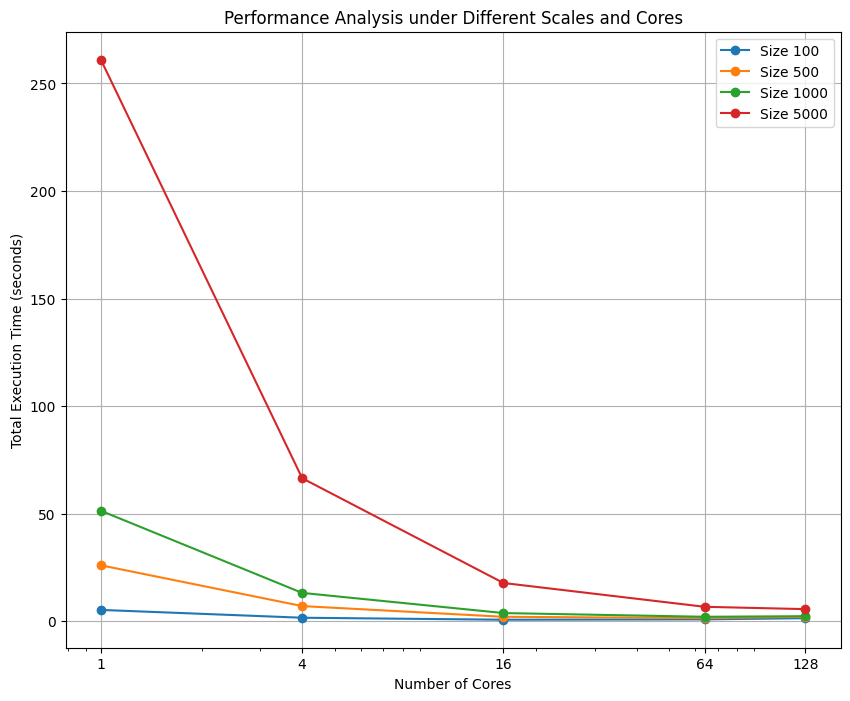

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from main_final import main, argparse  # Assuming `main` can be called with parsed arguments

## Experiment Function
def run_experiment(m, n, psi_size, mp_cores):
    args = argparse.Namespace(m=m, n=n, psi_size=psi_size, filename=f"test_{m}_{n}", method='R', mp=mp_cores)
    _ , timing = main(args)
    return timing

## Parameters for the experiment
sizes = [100, 500, 1000, 5000]  # Varying sizes for the client and server sets
cores = [1, 4, 16, 64, 128]  # Number of multiprocessing cores

## Results matrix
results = np.zeros((len(sizes), len(cores)))

## Running the experiments
for i, size in enumerate(sizes):
    for j, core in enumerate(cores):
        print(f"Running experiment with size {size} and {core} cores")
        total_time = run_experiment(size, size, int(size/2), core)
        results[i][j] = total_time

## Plotting the results
plt.figure(figsize=(10, 8))
for i in range(len(sizes)):
    plt.plot(cores, results[i, :], marker='o', label=f'Size {sizes[i]}')

plt.title('Performance Analysis under Different Scales and Cores')
plt.xlabel('Number of Cores')
plt.ylabel('Total Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.xticks(cores, cores)  # Ensure that core counts are properly labeled
plt.show()

Running experiment with size 2000 and 4 cores
Running experiment with size 2000 and 8 cores
Running experiment with size 2000 and 16 cores
Running experiment with size 2000 and 32 cores
Running experiment with size 2000 and 64 cores
Running experiment with size 2000 and 128 cores
Running experiment with size 4000 and 4 cores
Running experiment with size 4000 and 8 cores
Running experiment with size 4000 and 16 cores
Running experiment with size 4000 and 32 cores
Running experiment with size 4000 and 64 cores
Running experiment with size 4000 and 128 cores
Running experiment with size 8000 and 4 cores
Running experiment with size 8000 and 8 cores
Running experiment with size 8000 and 16 cores
Running experiment with size 8000 and 32 cores
Running experiment with size 8000 and 64 cores
Running experiment with size 8000 and 128 cores
Running experiment with size 16000 and 4 cores
Running experiment with size 16000 and 8 cores
Running experiment with size 16000 and 16 cores
Running experim

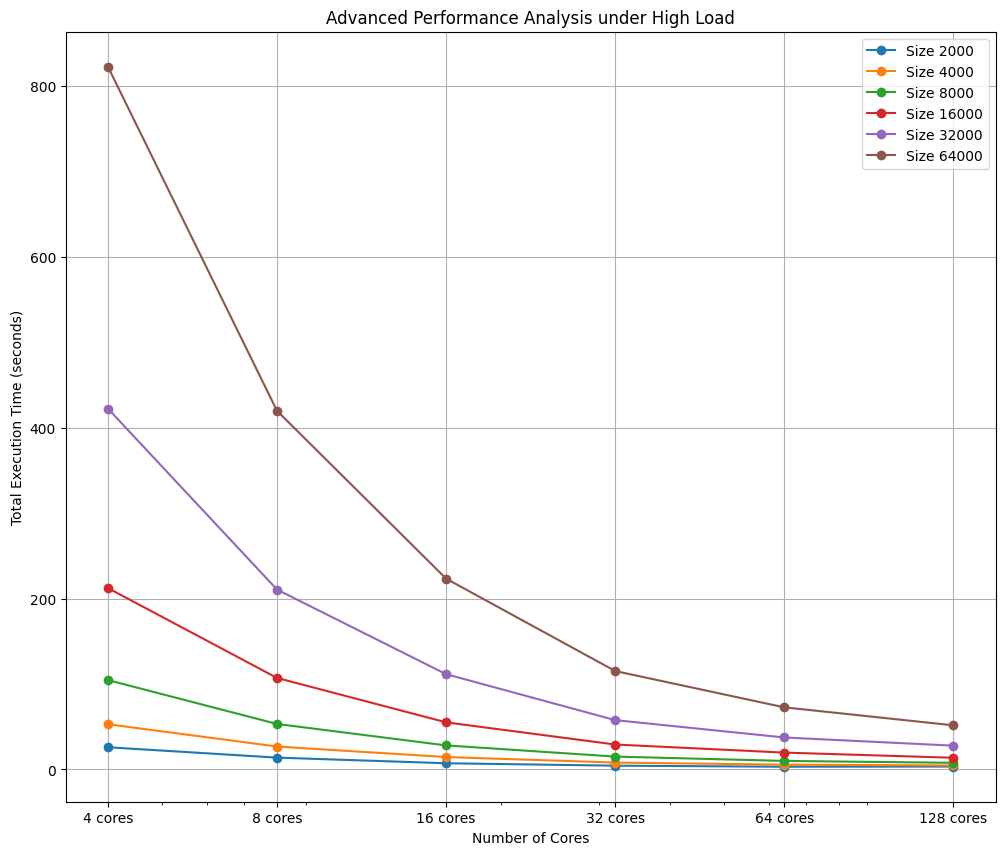

In [2]:
# Notebook: Advanced Performance Analysis of PSI Protocols under High Load

## Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from main_final import main, argparse  # Ensure `main` is appropriately defined to handle args


## Parameters for the experiment
sizes = [2000, 4000, 8000, 16000, 32000, 64000]  # Increasing sizes for the client and server sets
cores = [4, 8, 16, 32, 64, 128]  # Number of multiprocessing cores, starting from 4

## Results matrix
results = np.zeros((len(sizes), len(cores)))

## Running the experiments
for i, size in enumerate(sizes):
    for j, core in enumerate(cores):
        print(f"Running experiment with size {size} and {core} cores")
        total_time = run_experiment(size, size, int(size/10), core)
        results[i][j] = total_time

## Plotting the results
plt.figure(figsize=(12, 10))
for i in range(len(sizes)):
    plt.plot(cores, results[i, :], marker='o', label=f'Size {sizes[i]}')

plt.title('Advanced Performance Analysis under High Load')
plt.xlabel('Number of Cores')
plt.ylabel('Total Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.xticks(cores, [str(core) + " cores" for core in cores])  # Ensure that core counts are properly labeled
plt.show()


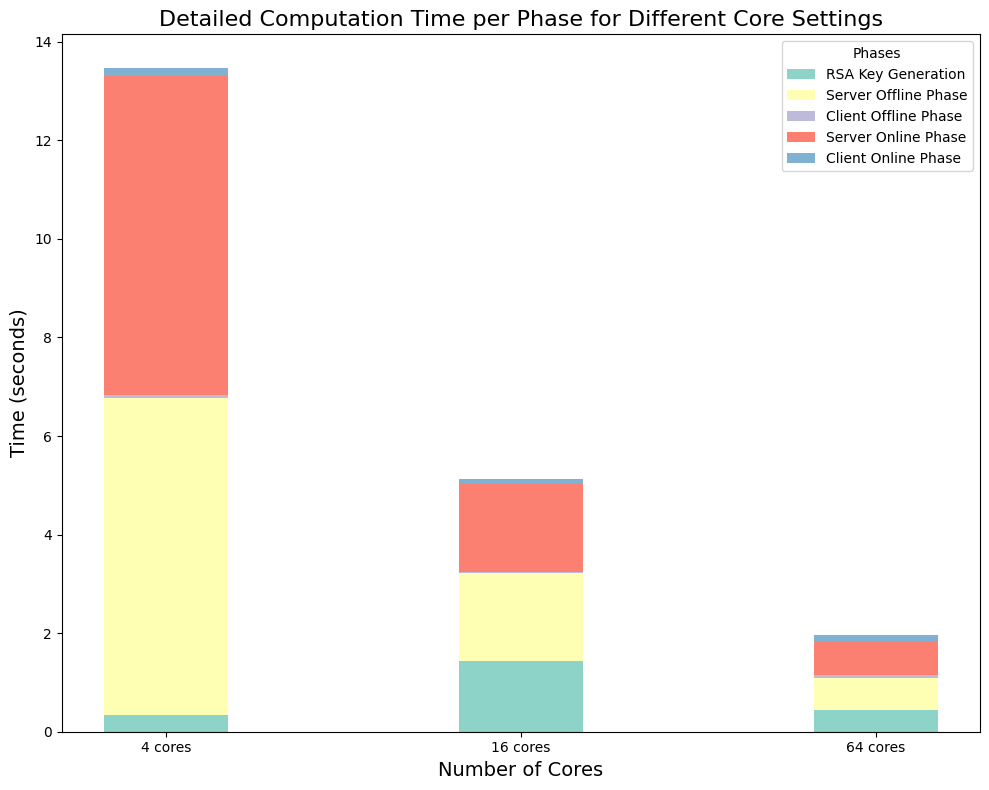

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the core settings and corresponding phase times
cores = ['4 cores', '16 cores', '64 cores']
times = {
    # 'RSA Key Generation': [0.337432, 1.431296, 0.447365],
    'Server Offline Phase': [6.442960, 1.785452, 0.649237],
    'Client Offline Phase': [0.058270, 0.030885, 0.054427],
    'Server Online Phase': [6.458405, 1.788004, 0.686834],
    'Client Online Phase': [0.179900, 0.083969, 0.130883]
}

# Enhanced color palette
colors = ['#ffffb3', '#bebada', '#fb8072', '#80b1d3']

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Position of bars on the x-axis
index = np.arange(len(cores))

# Bottom for the stacked bar chart
bottom = np.zeros(len(cores))

# Plotting each phase
for phase, time in times.items():
    plt.bar(index, time, bottom=bottom, color=colors.pop(0), label=phase, width=0.35)  # Reduced bar width
    bottom += np.array(time)  # Update the bottom position for the next stack

# Adding labels and titles
plt.xlabel('Number of Cores', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Detailed Computation Time per Phase for Different Core Settings', fontsize=16)
plt.xticks(index, cores)

# Adding a legend with a frame
plt.legend(title="Phases", loc='upper right', frameon=True, framealpha=0.8, facecolor='white')

# Show the plot
plt.tight_layout()
plt.show()
